# Load libraries and data sets

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [36]:
# Load data set "european GDP"

path = r'G:\Career Foundery\CFundry-6'
euro_gdp = pd.read_csv(os.path.join(path, '2 Data set', 'Original', 'namq_10_gdp_linear.csv','namq_10_gdp_linear.csv'), index_col=False)
euro_gdp.head()

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NAMQ_10_GDP(1.0),18/08/22 23:00:00,Q,CLV05_MEUR,CA,B1G,AT,1995-Q1,42135.9,NaN
1,ESTAT:NAMQ_10_GDP(1.0),18/08/22 23:00:00,Q,CLV05_MEUR,CA,B1G,AT,1995-Q2,44639.0,NaN
2,ESTAT:NAMQ_10_GDP(1.0),18/08/22 23:00:00,Q,CLV05_MEUR,CA,B1G,AT,1995-Q3,44692.6,NaN
3,ESTAT:NAMQ_10_GDP(1.0),18/08/22 23:00:00,Q,CLV05_MEUR,CA,B1G,AT,1995-Q4,46311.5,NaN
4,ESTAT:NAMQ_10_GDP(1.0),18/08/22 23:00:00,Q,CLV05_MEUR,CA,B1G,AT,1996-Q1,42916.0,NaN


In [37]:
# remove redundant columns
euro_gdp.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG'], axis=1, inplace=True)

In [38]:
# just keep the information for 'Chain linked volumes (2015), million euro [CLV15_MEUR]', 
# 'Seasonally and calendar adjusted data [SCA]' of 'Gross domestic product at market prices [B1GQ]'
euro_gdp = euro_gdp[(euro_gdp['na_item']=='B1GQ') & (euro_gdp['s_adj']=='SCA') & (euro_gdp['unit']=='CLV15_MEUR')]
euro_gdp.head()

,unit,s_adj,na_item,geo,TIME_PERIOD,OBS_VALUE
997182,CLV15_MEUR,SCA,B1GQ,AT,1995-Q1,59780.9
997183,CLV15_MEUR,SCA,B1GQ,AT,1995-Q2,60233.1
997184,CLV15_MEUR,SCA,B1GQ,AT,1995-Q3,60432.1
997185,CLV15_MEUR,SCA,B1GQ,AT,1995-Q4,61000.1
997186,CLV15_MEUR,SCA,B1GQ,AT,1996-Q1,61194.2


In [39]:
# remove redundant columns
euro_gdp.drop(['unit', 'na_item', 's_adj'], axis=1, inplace=True)

In [40]:
# define the name of columns
euro_gdp.rename(columns={'geo': 'country-code', 'TIME_PERIOD': 'time-period', 'OBS_VALUE': 'GDP(mm-euro)'}, inplace=True)

In [41]:
# remove data for different european union definitions
euro_gdp = euro_gdp[~euro_gdp['country-code'].isin(['EU27_2020', 'EU28', 'EU15', 'EA', 'EA19', 'EA12'])]

In [42]:
# define the codes of countries and fuels
country_codes = {'SK':'Slovakia', 'FI':'Finland', 'SE':'Sweden', 'IS':'Iceland','NO':'Norway', 'UK':'United Kingdom',
                 'ME': 'Montenegro','MK':'North Macedonia', 'CH':'Switzerland',
                 'AL':'Albania', 'RS':'Serbia', 'TR':'Turkey', 'BA':'Bosnia and Herzegovina', 
                 'BE':'Belgium', 'BG':'Bulgaria', 'CZ':'Czechia', 'DK':'Denmark', 'XK':'Kosovo',
                 'DE':'Germany', 'EE':'Estonia', 'IE':'Ireland', 'EL':'Greece', 'ES': 'Spain', 'FR':'France', 'HR':'Croatia',
                 'IT':'Italy', 'CY':'Cyprus', 'LV':'Latvia', 'LT':'Lithuania', 'LU':'Luxembourg', 'HU':'Hungary', 'MT':'Malta',
                 'NL':'Netherlands', 'AT':'Austria', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SI':'Slovenia'}
len(country_codes)

38

In [43]:
# replace country abbreviations by full name
euro_gdp['country'] = list(map(country_codes.get, euro_gdp['country-code'].tolist()))

In [44]:
# remove columns: country-code
euro_gdp.drop(['country-code'], axis=1, inplace=True)

In [45]:
# arrange columns
euro_gdp = euro_gdp[['country','time-period','GDP(mm-euro)'  ]]
euro_gdp.head()

,country,time-period,GDP(mm-euro)
997182,Austria,1995-Q1,59780.9
997183,Austria,1995-Q2,60233.1
997184,Austria,1995-Q3,60432.1
997185,Austria,1995-Q4,61000.1
997186,Austria,1996-Q1,61194.2


In [46]:
# shape of final data set
euro_gdp.shape

(3947, 3)

In [47]:
# data types
euro_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3947 entries, 997182 to 1001768
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       3947 non-null   object 
 1   time-period   3947 non-null   object 
 2   GDP(mm-euro)  3943 non-null   float64
dtypes: float64(1), object(2)
memory usage: 123.3+ KB


### there are 4 null values in 'GDP(mm-euro)'

In [48]:
# check for mixed data type in df_ords
for col in euro_gdp.columns.tolist():
  weird = (euro_gdp[[col]].applymap(type) != euro_gdp[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (euro_gdp[weird]) > 0:
    print (col + ' contains mixed data types')
  else:
    print (col + ' doesn\'t contain mixed data types')

country doesn't contain mixed data types
time-period doesn't contain mixed data types
GDP(mm-euro) doesn't contain mixed data types


In [49]:
# descriptive statisr=tics
euro_gdp.describe()

,GDP(mm-euro)
count,3943.000000
mean,120883.179128
std,176701.640340
min,1375.700000
25%,9986.000000
50%,47617.800000
75%,120692.750000
max,813456.200000


<AxesSubplot:ylabel='Frequency'>

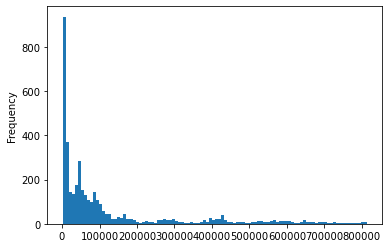

In [50]:
# distribution plot of gdp
euro_gdp['GDP(mm-euro)'].plot.hist(bins=100)

In [51]:
# value counts for country
euro_gdp['country'].value_counts()

United Kingdom            183
Norway                    178
France                    170
Switzerland               169
Finland                   130
Germany                   126
Sweden                    117
Slovakia                  110
Slovenia                  110
Romania                   110
Lithuania                 110
Austria                   110
Spain                     110
Italy                     110
Croatia                   109
Hungary                   109
Belgium                   109
Bulgaria                  109
Cyprus                    109
Serbia                    109
Czechia                   109
Portugal                  109
Poland                    109
Denmark                   109
Greece                    109
Latvia                    109
Luxembourg                109
Estonia                   109
Ireland                   109
Netherlands               106
Turkey                     97
Malta                      89
Bosnia and Herzegovina     89
North Mace

In [53]:
# value counts for time_period
euro_gdp['time-period'].value_counts()

2018-Q4    34
2011-Q2    34
2013-Q4    34
2013-Q3    34
2013-Q2    34
           ..
1976-Q4     1
1977-Q1     1
1977-Q2     1
1977-Q3     1
1977-Q4     1
Name: time-period, Length: 190, dtype: int64

In [54]:
euro_gdp[euro_gdp['GDP(mm-euro)'].isnull()]

,country,time-period,GDP(mm-euro)
997877,Czechia,1995-Q1,NaN
997878,Czechia,1995-Q2,NaN
997879,Czechia,1995-Q3,NaN
997880,Czechia,1995-Q4,NaN


In [56]:
# put null values as 0
euro_gdp.loc[euro_gdp['GDP(mm-euro)'].isnull(), 'GDP(mm-euro)'] = 0

In [57]:
# duplicate rows
euro_gdp[euro_gdp.duplicated()]

,country,time-period,GDP(mm-euro)


In [58]:
# final format
euro_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3947 entries, 997182 to 1001768
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       3947 non-null   object 
 1   time-period   3947 non-null   object 
 2   GDP(mm-euro)  3947 non-null   float64
dtypes: float64(1), object(2)
memory usage: 123.3+ KB


In [83]:
# reset index for new dataset
euro_gdp.reset_index(inplace=True, drop=True)
euro_gdp

,country,time-period,GDP(mm-euro)
0,Austria,1995-Q1,59780.9
1,Austria,1995-Q2,60233.1
2,Austria,1995-Q3,60432.1
3,Austria,1995-Q4,61000.1
4,Austria,1996-Q1,61194.2
...,...,...,...
3942,United Kingdom,2019-Q3,704735.7
3943,United Kingdom,2019-Q4,704857.4
3944,United Kingdom,2020-Q1,683577.1
3945,United Kingdom,2020-Q2,555388.0


In [84]:
# save data set
euro_gdp.to_csv(os.path.join(path, '2 Data set', 'Modified', 'euro_gdp.csv'))
euro_gdp.to_pickle(os.path.join(path, '2 Data set', 'Modified', 'euro_gdp.pkl'))

# Load population data set

In [71]:
# Load data set "european GDP"

path = r'G:\Career Foundery\CFundry-6'
euro_pup = pd.read_csv(os.path.join(path, '2 Data set', 'Original', 'demo_pjan_linear.csv','demo_pjan_linear.csv'), index_col=False)
euro_pup.head()

,DATAFLOW,LAST UPDATE,freq,unit,age,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_PJAN(1.0),22/06/22 23:00:00,A,NR,TOTAL,F,AD,1986,20898.0,NaN
1,ESTAT:DEMO_PJAN(1.0),22/06/22 23:00:00,A,NR,TOTAL,F,AD,1987,22148.0,NaN
2,ESTAT:DEMO_PJAN(1.0),22/06/22 23:00:00,A,NR,TOTAL,F,AD,1988,22814.0,NaN
3,ESTAT:DEMO_PJAN(1.0),22/06/22 23:00:00,A,NR,TOTAL,F,AD,1989,23813.0,NaN
4,ESTAT:DEMO_PJAN(1.0),22/06/22 23:00:00,A,NR,TOTAL,F,AD,1990,24171.0,NaN


In [72]:
# remove redundant columns
euro_pup.drop(['DATAFLOW', 'LAST UPDATE', 'unit', 'freq', 'OBS_FLAG'], axis=1, inplace=True)

In [73]:
# extract data just for 'total population'
euro_pup = euro_pup[(euro_pup['age']=='TOTAL') & (euro_pup['sex']=='T')]
euro_pup.head()

,age,sex,geo,TIME_PERIOD,OBS_VALUE
5262,TOTAL,T,AD,1986,44593.0
5263,TOTAL,T,AD,1987,46976.0
5264,TOTAL,T,AD,1988,48451.0
5265,TOTAL,T,AD,1989,50528.0
5266,TOTAL,T,AD,1990,50887.0


In [74]:
# remove age and sex columns
euro_pup.drop(['age', 'sex'], axis=1, inplace=True)

In [75]:
# rename columns
euro_pup.rename(columns={'geo':'country-code', 'TIME_PERIOD':'time-period', 'OBS_VALUE':'population'}, inplace=True)

In [76]:
# remove data for different european union definitions
euro_pup = euro_pup[~euro_pup['country-code'].isin(['EU27_2020', 'EU28','EA19','EU27_2007','EA18',
                                                   'DE','FX','EEA31','EEA30_2007','EFTA',])]

In [77]:
# define the codes of countries and fuels
country_codes2 = {'SK':'Slovakia', 'FI':'Finland', 'SE':'Sweden', 'IS':'Iceland','NO':'Norway', 'UK':'United Kingdom',
                 'ME': 'Montenegro','MK':'North Macedonia', 'CH':'Switzerland', 'LI':'Liechtenstein', 'MD':'Moldova',
                 'AL':'Albania', 'RS':'Serbia', 'TR':'Turkey', 'AD':'Andorra','BA':'Bosnia and Herzegovina', 'MC':'Monaco',
                 'BE':'Belgium', 'BG':'Bulgaria', 'CZ':'Czechia', 'DK':'Denmark', 'XK':'Kosovo', 'BY':'Belarus', 'RU':'Russia',
                 'DE_TOT':'Germany', 'EE':'Estonia', 'IE':'Ireland', 'EL':'Greece', 'ES': 'Spain', 'FR':'France', 'HR':'Croatia',
                 'IT':'Italy', 'CY':'Cyprus', 'LV':'Latvia', 'LT':'Lithuania', 'LU':'Luxembourg', 'HU':'Hungary', 'MT':'Malta',
                 'NL':'Netherlands', 'AT':'Austria', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SI':'Slovenia', 'SM':'San Marino',
                 'UA':'Ukraine', 'AM':'Armenia', 'AZ':'Azerbaijan','GE':'Georgia'}
len(country_codes2)

49

In [78]:
# replace country abbreviations by full name
euro_pup['country'] = list(map(country_codes2.get, euro_pup['country-code'].tolist()))

In [79]:
# remove columns: country-code
euro_pup.drop(['country-code'], axis=1, inplace=True)

In [81]:
# arrange columns
euro_pup = euro_pup[['country','time-period','population']]
euro_pup.head()

,country,time-period,population
5262,Andorra,1986,44593.0
5263,Andorra,1987,46976.0
5264,Andorra,1988,48451.0
5265,Andorra,1989,50528.0
5266,Andorra,1990,50887.0


In [85]:
# reset index for new dataset
euro_pup.reset_index(inplace=True, drop=True)
euro_pup

,country,time-period,population
0,Andorra,1986,44593.0
1,Andorra,1987,46976.0
2,Andorra,1988,48451.0
3,Andorra,1989,50528.0
4,Andorra,1990,50887.0
...,...,...,...
2407,Kosovo,2016,1771604.0
2408,Kosovo,2017,1783531.0
2409,Kosovo,2018,1798506.0
2410,Kosovo,2019,1795666.0


In [86]:
# data type 
euro_pup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      2412 non-null   object 
 1   time-period  2412 non-null   int64  
 2   population   2411 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 56.7+ KB


### There is one null value in population

In [87]:
euro_pup.describe()

,time-period,population
count,2412.000000,2.411000e+03
mean,1992.473466,1.493615e+07
std,17.900612,2.239938e+07
min,1960.000000,1.627400e+04
25%,1977.000000,2.306092e+06
50%,1994.000000,5.457873e+06
75%,2008.000000,1.069639e+07
max,2021.000000,1.468901e+08


In [88]:
# check for mixed data type in df_ords
for col in euro_pup.columns.tolist():
  weird = (euro_pup[[col]].applymap(type) != euro_pup[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (euro_pup[weird]) > 0:
    print (col + ' contains mixed data types')
  else:
    print (col + ' doesn\'t contain mixed data types')

country doesn't contain mixed data types
time-period doesn't contain mixed data types
population doesn't contain mixed data types


In [90]:
euro_pup.isnull().sum()

country        0
time-period    0
population     1
dtype: int64

In [91]:
# put null values as 0
euro_pup.loc[euro_pup['population'].isnull(), 'population'] = 0

In [92]:
# value count for country
euro_pup['country'].value_counts()

Italy                     62
Lithuania                 62
Croatia                   62
Hungary                   62
Ireland                   62
Iceland                   62
Albania                   62
Liechtenstein             62
Luxembourg                62
Poland                    62
Latvia                    62
Sweden                    62
Romania                   62
Portugal                  62
North Macedonia           62
Netherlands               62
Slovenia                  62
Norway                    62
Finland                   62
Switzerland               62
Austria                   62
Turkey                    62
Belgium                   62
Bulgaria                  62
Spain                     62
Slovakia                  62
Cyprus                    62
Czechia                   62
Germany                   62
Denmark                   62
Estonia                   62
Greece                    62
United Kingdom            61
Malta                     51
Bosnia and Her

In [93]:
# value counts for time-period
euro_pup['time-period'].value_counts()

2005    49
2004    49
2012    48
2007    48
2008    48
        ..
1966    34
1964    34
1963    34
1961    34
1962    34
Name: time-period, Length: 62, dtype: int64

In [94]:
set(euro_pup['time-period'])

{1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021}

In [95]:
# check for duplicates 
euro_pup[euro_pup.duplicated()]

,country,time-period,population


In [96]:
# final data set
euro_pup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      2412 non-null   object 
 1   time-period  2412 non-null   int64  
 2   population   2412 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 56.7+ KB


In [98]:
euro_pup.shape

(2412, 3)

In [99]:
euro_pup

,country,time-period,population
0,Andorra,1986,44593.0
1,Andorra,1987,46976.0
2,Andorra,1988,48451.0
3,Andorra,1989,50528.0
4,Andorra,1990,50887.0
...,...,...,...
2407,Kosovo,2016,1771604.0
2408,Kosovo,2017,1783531.0
2409,Kosovo,2018,1798506.0
2410,Kosovo,2019,1795666.0


In [100]:
# save final data set
euro_pup.to_csv(os.path.join(path, '2 Data set', 'Modified', 'euro_population.csv'))
euro_pup.to_pickle(os.path.join(path, '2 Data set', 'Modified', 'euro_population.pkl'))

# Load european country areas

In [113]:
# Load data set "european GDP"

path = r'G:\Career Foundery\CFundry-6'
euro_area = pd.read_excel(os.path.join(path, '2 Data set', 'Original', 'european areas.xlsx'), index_col=False, header=1)
euro_area

,Unnamed: 0,country,area KM2
0,NaN,Russia,17098242.00
1,NaN,France,643801.00
2,NaN,Ukraine,603550.00
3,NaN,Spain,505370.00
4,NaN,Sweden,450295.00
5,NaN,Germany,357022.00
6,NaN,Finland,338145.00
7,NaN,Norway,323802.00
8,NaN,Poland,312685.00
9,NaN,Italy,301340.00


In [115]:
# remove the first column
euro_area.drop(columns=['Unnamed: 0'], inplace=True)
euro_area

,country,area KM2
0,Russia,17098242.00
1,France,643801.00
2,Ukraine,603550.00
3,Spain,505370.00
4,Sweden,450295.00
5,Germany,357022.00
6,Finland,338145.00
7,Norway,323802.00
8,Poland,312685.00
9,Italy,301340.00


In [116]:
# define column names
euro_area.rename(columns={'area KM2':'area(Km^2)'}, inplace=True)

In [117]:
# check data type
euro_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     55 non-null     object 
 1   area(Km^2)  55 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1008.0+ bytes


In [118]:
euro_area.describe()

,area(Km^2)
count,5.500000e+01
mean,4.210081e+05
std,2.295916e+06
min,4.400000e-01
25%,9.825000e+02
50%,4.903500e+04
75%,1.214180e+05
max,1.709824e+07


In [119]:
# final dataset
euro_area

,country,area(Km^2)
0,Russia,17098242.00
1,France,643801.00
2,Ukraine,603550.00
3,Spain,505370.00
4,Sweden,450295.00
5,Germany,357022.00
6,Finland,338145.00
7,Norway,323802.00
8,Poland,312685.00
9,Italy,301340.00


In [120]:
# save final data set
euro_area.to_csv(os.path.join(path, '2 Data set', 'Modified', 'euro_area.csv'))
euro_area.to_pickle(os.path.join(path, '2 Data set', 'Modified', 'euro_area.pkl'))